In [3]:
import numpy as np
from matplotlib import pyplot as plt
from tifffile import imread
from skimage.filters import threshold_multiotsu
import os
import porespy as ps
from tifffile import imwrite
from hydra.experimental import compose, initialize
from omegaconf import OmegaConf
import torch
from matplotlib import pyplot as plt
from tifffile import imread
import numpy as np
import pickle
from hydra.experimental import compose, initialize
import os
import torch
from lpu3dnet.frame import vqgan
from lpu3dnet.frame import transformer

In [4]:
# glabal variables

def results_display(sample_idx,vol_dim,root_dir):
    with open(f'{root_dir}/sample_{sample_idx}/df_results_{vol_dim}.pickle', 'rb') as file:
        # Deserialize the data from the file and assign it to a variable
        sim_results = pickle.load(file)
    print("prediction is {}".format(sim_results['prediction']['kabs']))
    print("real one is {}".format(sim_results['real']['kabs']))

    for i in range(len(sim_results['compare'])):
        print(sim_results['compare'][i]['kabs'])
    
    f = plt.figure()
    plt.plot(sim_results['prediction']['snw'],sim_results['prediction']['kr_air'],'bo',label='prediction')
    plt.plot(sim_results['real']['snw'],sim_results['real']['kr_air'],'ro',label='real')
    for i in range(len(sim_results['compare'])):
        plt.plot(sim_results['compare'][i]['snw'],sim_results['compare'][i]['kr_air'],'ko',label='reference')
    plt.legend()





## random block conditioning


Of course you are welcome to DIY

prediction is [87.03744551]
real one is [94.20806733]
[315.17873172]
[175.14581452]
[459.24859026]
[172.87361755]
[104.14955676]


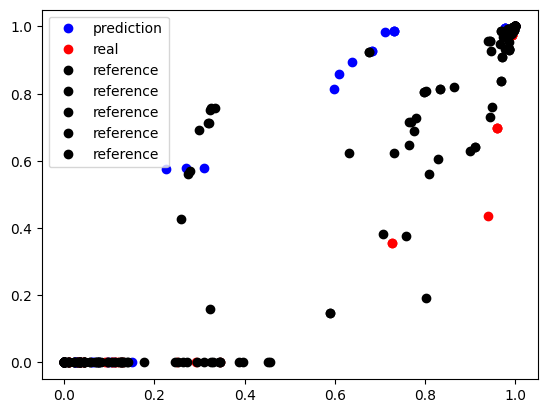

In [5]:
sample_idx = 0
vol_dim = 3
root_dir = 'data_ref_hard'
with open(f'{root_dir}/sample_{sample_idx}/df_results_{vol_dim}.pickle', 'rb') as file:
    # Deserialize the data from the file and assign it to a variable
    sim_results = pickle.load(file)


print("prediction is {}".format(sim_results['prediction']['kabs']))
print("real one is {}".format(sim_results['real']['kabs']))

for i in range(len(sim_results['compare'])):
    print(sim_results['compare'][i]['kabs'])

f = plt.figure()
plt.plot(sim_results['prediction']['snw'],sim_results['prediction']['kr_air'],'bo',label='prediction')
plt.plot(sim_results['real']['snw'],sim_results['real']['kr_air'],'ro',label='real')
for i in range(len(sim_results['compare'])):
    plt.plot(sim_results['compare'][i]['snw'],sim_results['compare'][i]['kr_air'],'ko',label='reference')
plt.legend()

In [6]:
sample_idx = 0
vol_dim = 3

with open(f'{root_dir}/sample_{sample_idx}/img_output_sample_{sample_idx}_vol_{vol_dim}.pkl', 'rb') as file:
    # Deserialize the data from the file and assign it to a variable
    img_results = pickle.load(file)

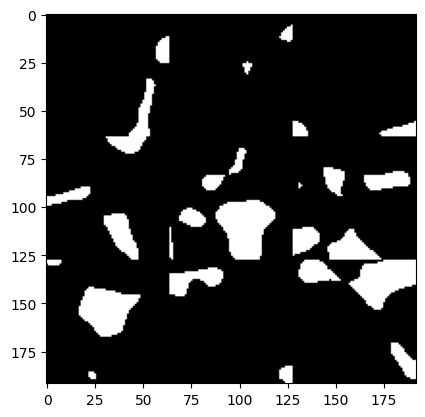

In [7]:
plt.imshow(img_results['generated'][:,100,:],cmap='gray')

In [ ]:
plt.imshow(img_results['generated'][:,100,:],cmap='gray')



sample 0:, vol_dim 3
prediction is [87.03744551]
real one is [94.20806733]
[315.17873172]
[175.14581452]
[459.24859026]
[172.87361755]
[104.14955676]


sample 1:, vol_dim 3
prediction is [118.16697835]
real one is [315.17873172]
[94.20806733]
[175.14581452]
[459.24859026]
[172.87361755]
[104.14955676]


sample 2:, vol_dim 3
prediction is [74.68280604]
real one is [175.14581452]
[94.20806733]
[315.17873172]
[459.24859026]
[172.87361755]
[104.14955676]


sample 3:, vol_dim 3
prediction is [183.83901522]
real one is [459.24859026]
[94.20806733]
[315.17873172]
[175.14581452]
[172.87361755]
[104.14955676]


sample 4:, vol_dim 3
prediction is [80.86545453]
real one is [172.87361755]
[94.20806733]
[315.17873172]
[175.14581452]
[459.24859026]
[104.14955676]


sample 5:, vol_dim 3
prediction is [59.00456039]
real one is [104.14955676]
[94.20806733]
[315.17873172]
[175.14581452]
[459.24859026]
[172.87361755]


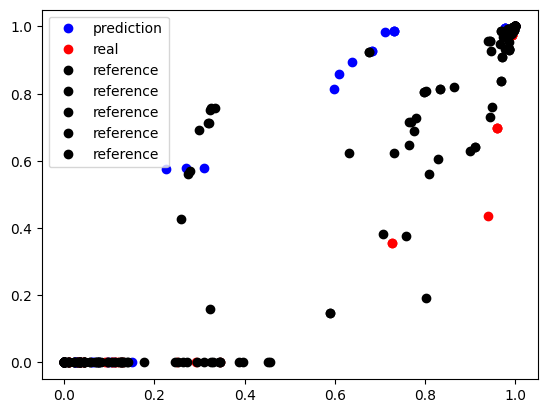

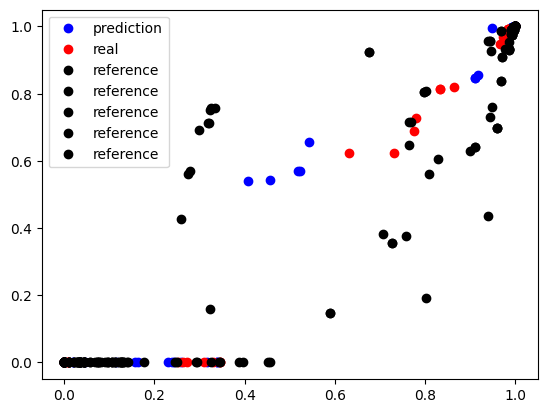

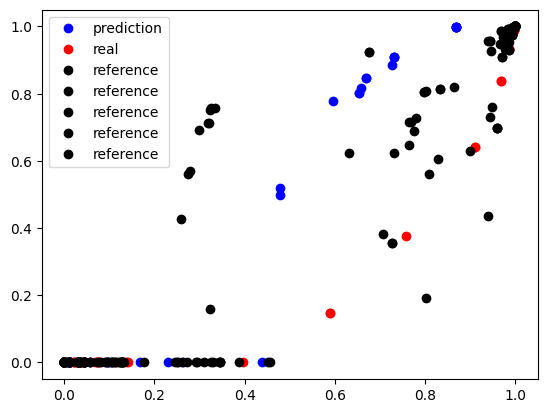

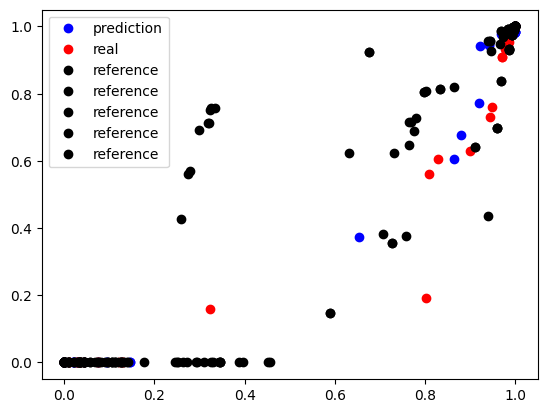

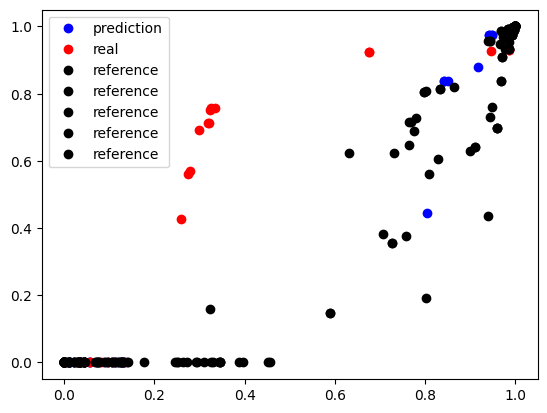

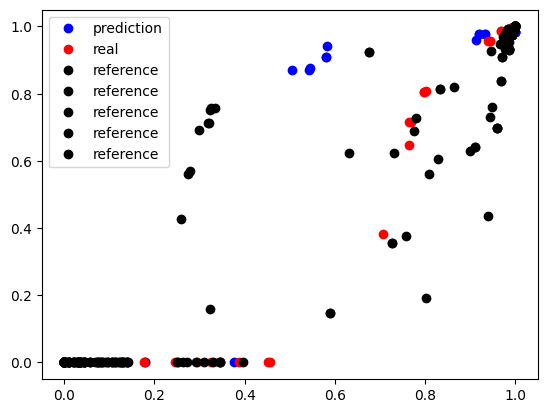

In [22]:
root_dir = 'data_ref_hard'
for i in range(6):
    print("\n")
    print(f"sample {i}:, vol_dim 3")
    results_display(i,3,root_dir)


#### With initial block sampling



sample 0:, vol_dim 3
prediction is [0.06568299]
real one is [94.20806733]
[315.17873172]
[175.14581452]
[459.24859026]
[172.87361755]
[104.14955676]


sample 1:, vol_dim 3
prediction is [273.05267134]
real one is [315.17873172]
[94.20806733]
[175.14581452]
[459.24859026]
[172.87361755]
[104.14955676]


sample 2:, vol_dim 3
prediction is [33.44124367]
real one is [175.14581452]
[94.20806733]
[315.17873172]
[459.24859026]
[172.87361755]
[104.14955676]


sample 3:, vol_dim 3
prediction is [120.2507331]
real one is [459.24859026]
[94.20806733]
[315.17873172]
[175.14581452]
[172.87361755]
[104.14955676]


sample 4:, vol_dim 3
prediction is [56.57847352]
real one is [172.87361755]
[94.20806733]
[315.17873172]
[175.14581452]
[459.24859026]
[104.14955676]


sample 5:, vol_dim 3
prediction is [20.21526828]
real one is [104.14955676]
[94.20806733]
[315.17873172]
[175.14581452]
[459.24859026]
[172.87361755]


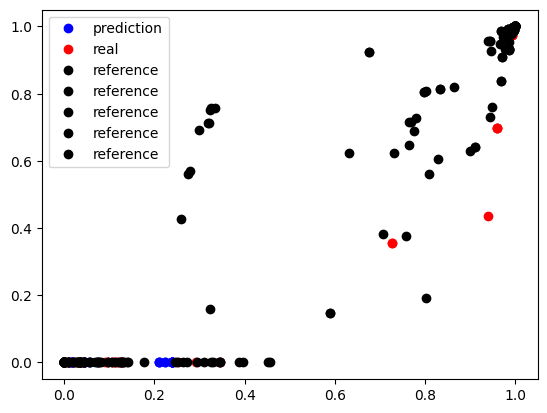

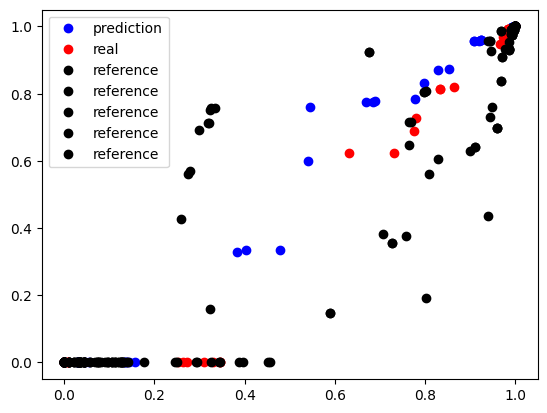

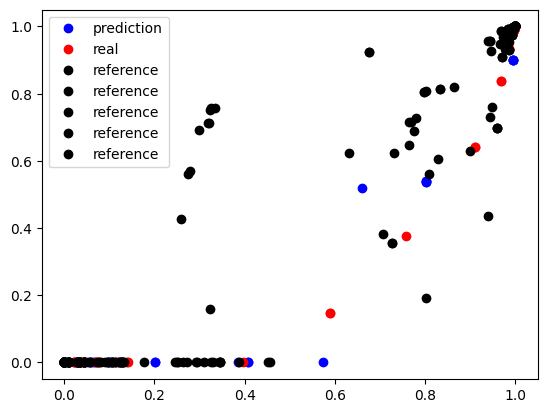

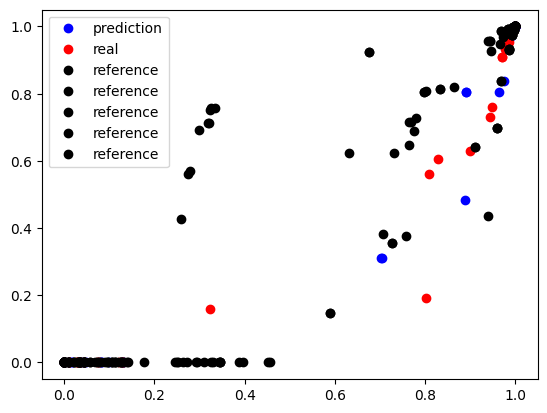

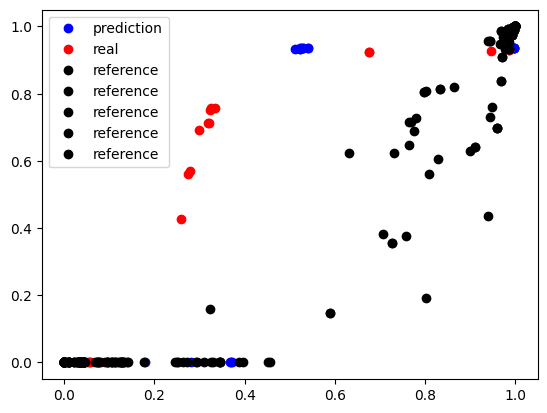

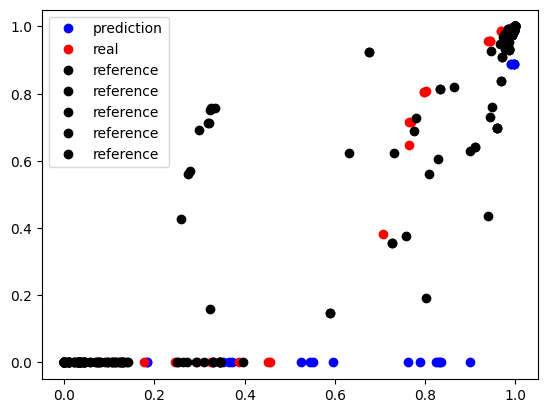

In [23]:
root_dir = 'data_ref'
for i in range(6):
    print("\n")
    print(f"sample {i}:, vol_dim 3")
    results_display(i,3,root_dir)



sample 0:, vol_dim 6
prediction is [12.88328251]
real one is [220.09733375]
[346.41348733]
[128.32501299]
[607.60482006]
[41.96425217]
[27.71830243]


sample 1:, vol_dim 6
prediction is [52.56797351]
real one is [346.41348733]
[220.09733375]
[128.32501299]
[607.60482006]
[41.96425217]
[27.71830243]


sample 2:, vol_dim 6
prediction is [44.1720687]
real one is [128.32501299]
[220.09733375]
[346.41348733]
[607.60482006]
[41.96425217]
[27.71830243]


sample 3:, vol_dim 6
prediction is [144.5724455]
real one is [607.60482006]
[220.09733375]
[346.41348733]
[128.32501299]
[41.96425217]
[27.71830243]


sample 4:, vol_dim 6
prediction is [10.5192613]
real one is [41.96425217]
[220.09733375]
[346.41348733]
[128.32501299]
[607.60482006]
[27.71830243]


sample 5:, vol_dim 6


FileNotFoundError: [Errno 2] No such file or directory: 'data_ref/sample_5/df_results_6.pickle'

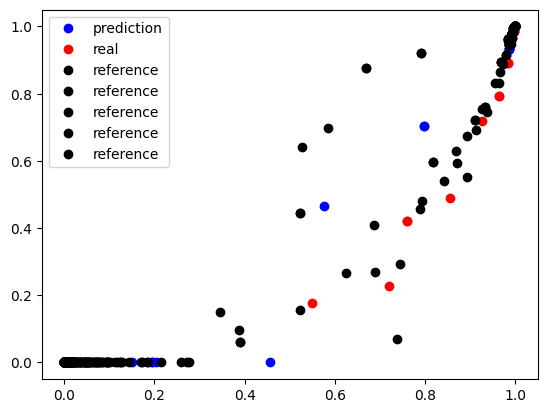

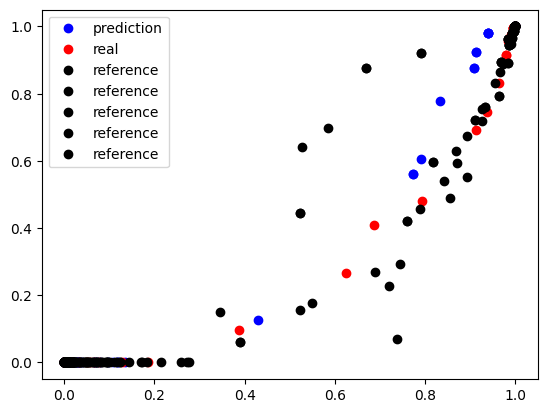

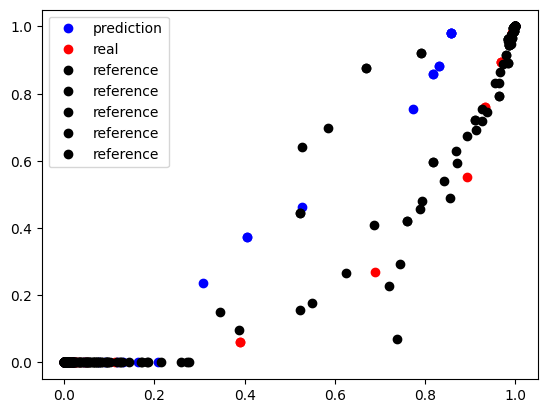

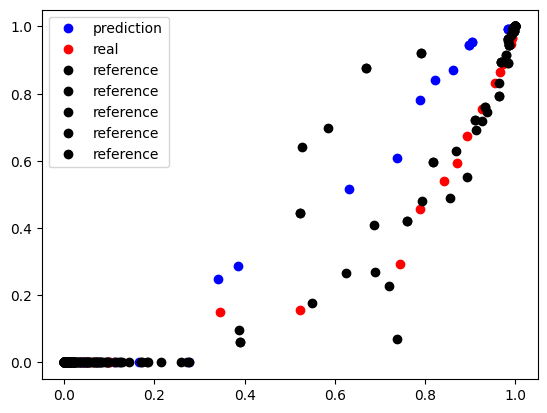

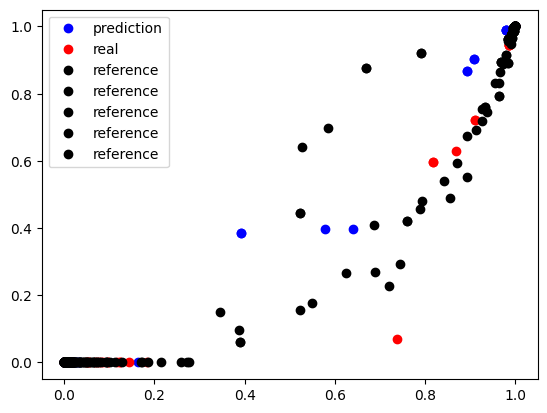

In [24]:
root_dir = 'data_ref'
for i in range(6):
    print("\n")
    print(f"sample {i}:, vol_dim 6")
    results_display(i,6,root_dir)